# Loan predictions

## Goal

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
| ------------- |-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:", missing_columns)

Columns with missing values: ['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


<Axes: >

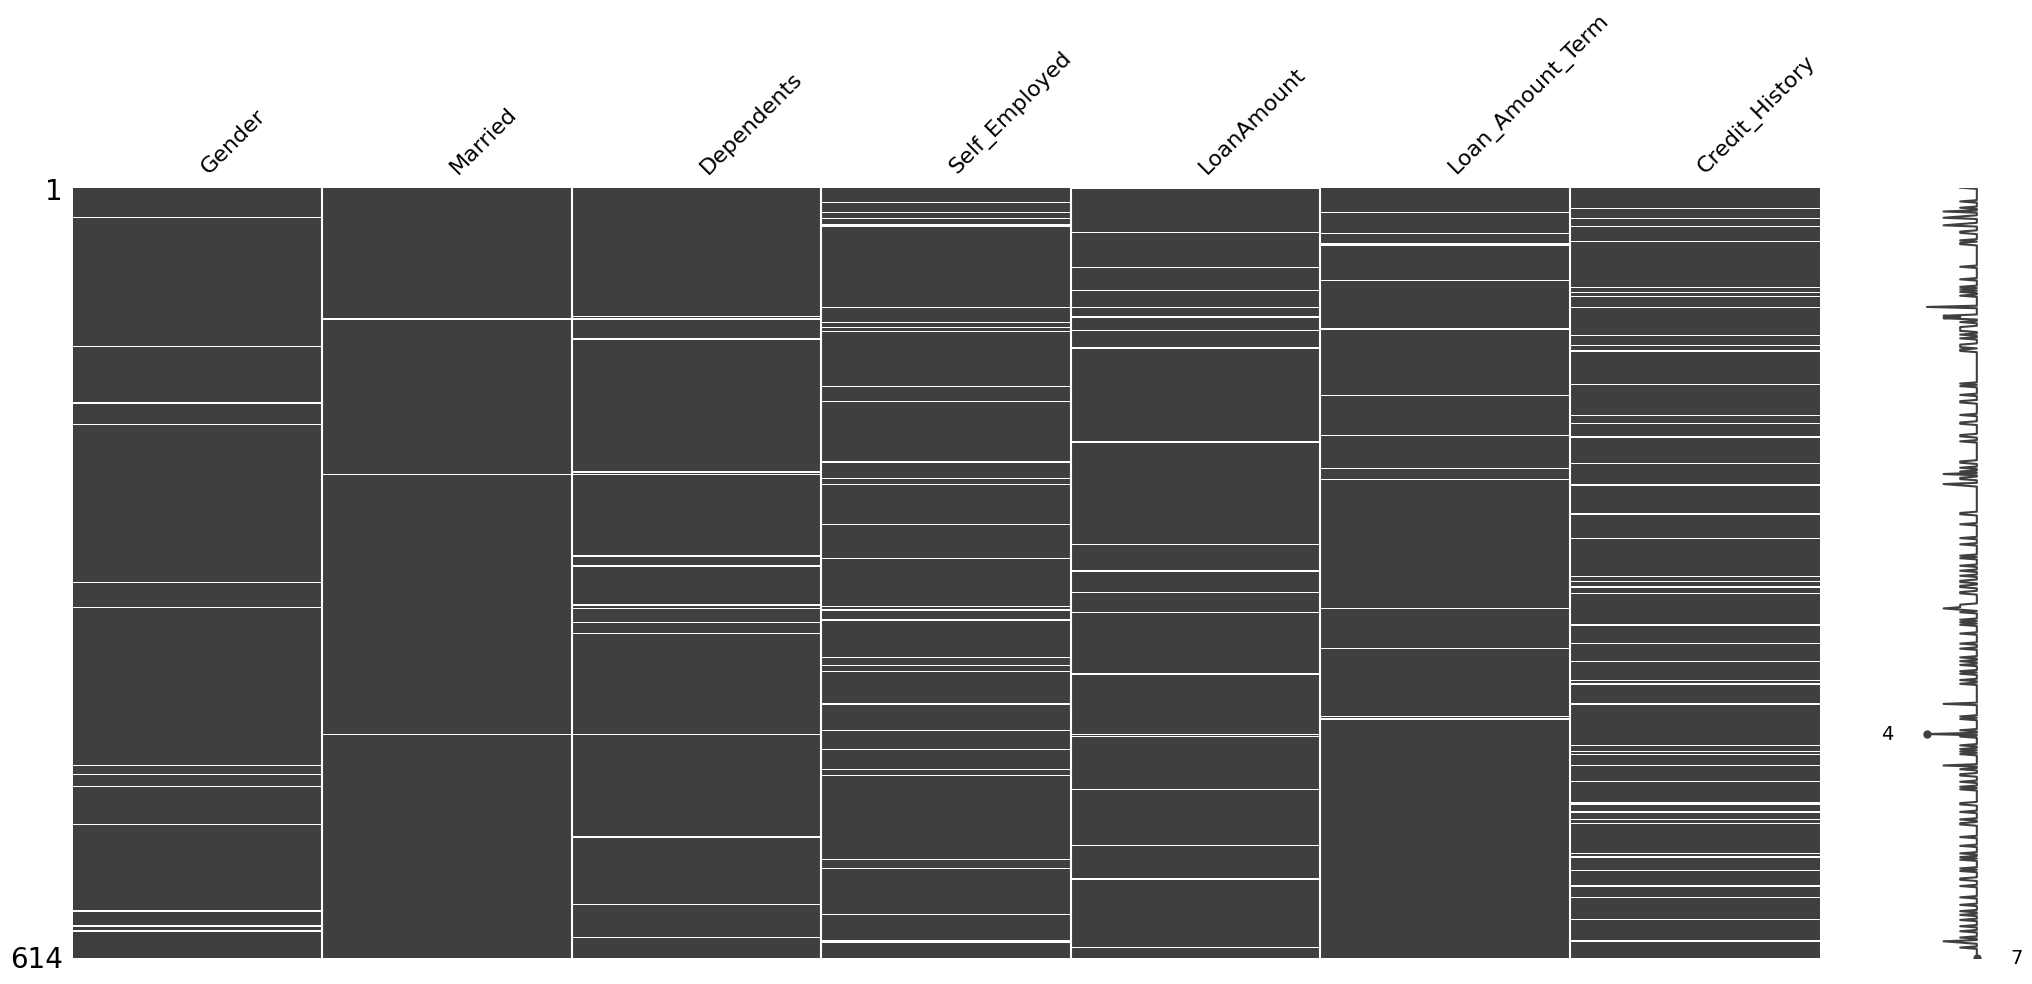

In [5]:
#Checking Missing Values Pattern in Dataframe
import missingno as mn

null_cols = [i for i in df.columns if df[i].isnull().any()]
print(null_cols)
mn.matrix(df[null_cols])

In [6]:
# Persentage of Missing Value:

missing_values = df.isna().sum().sort_values(ascending=False)
missing_percentage = missing_values[missing_values!=0]/len(df)*100
print("Percentage of Missing Values \n", missing_percentage)

Percentage of Missing Values 
 Credit_History      8.143322
Self_Employed       5.211726
LoanAmount          3.583062
Dependents          2.442997
Loan_Amount_Term    2.280130
Gender              2.117264
Married             0.488599
dtype: float64


Look at some basic statistics for numerical variables.


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)

In [8]:
credit_history = df.groupby("Credit_History").size()
credit_history

Credit_History
0.0     89
1.0    475
dtype: int64

2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?

In [9]:
applicant_income = df['ApplicantIncome'].describe()

applicant_income

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [10]:
coapplican_incam = df['CoapplicantIncome'].describe()
coapplican_incam

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

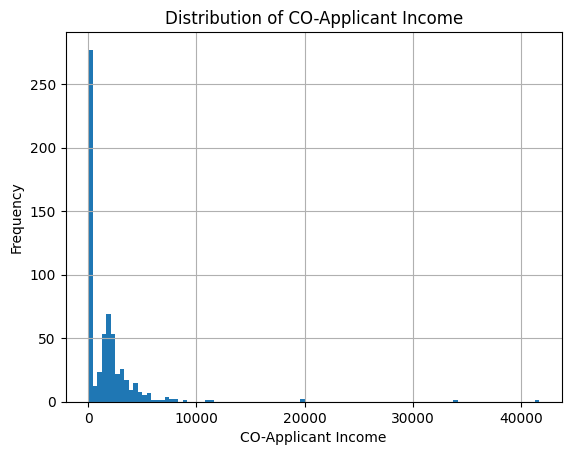

In [11]:
df['CoapplicantIncome'].hist(bins=100)  
plt.xlabel('CO-Applicant Income')
plt.ylabel('Frequency')
plt.title('Distribution of CO-Applicant Income')
plt.show()

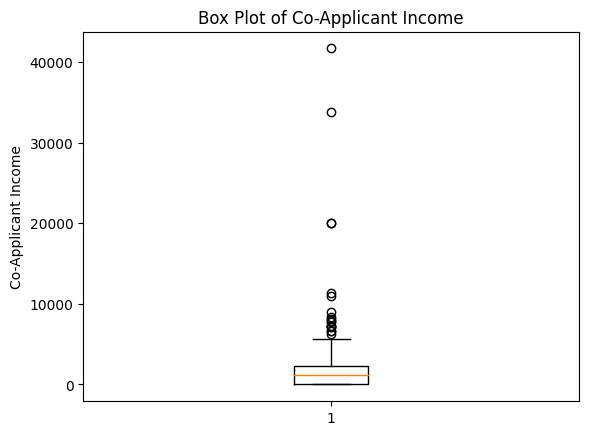

In [12]:
plt.boxplot(df['CoapplicantIncome'])
plt.ylabel('Co-Applicant Income')
plt.title('Box Plot of Co-Applicant Income')
plt.show()

3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.

In [13]:
mean = df['ApplicantIncome'].mean()
median = df['ApplicantIncome'].median()
print("Mean:", mean)
print("Median:", median)

Mean: 5403.459283387622
Median: 3812.5


Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [14]:
nominal_variables = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

for variable in nominal_variables:
    unique_values = df[variable].nunique()
    print(f"Number of unique values in '{variable}': {unique_values}")

Number of unique values in 'Gender': 2
Number of unique values in 'Married': 2
Number of unique values in 'Dependents': 4
Number of unique values in 'Education': 2
Number of unique values in 'Self_Employed': 2
Number of unique values in 'Property_Area': 3
Number of unique values in 'Loan_Status': 2


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [15]:
nominal_variables = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

for variable in nominal_variables:
    if variable != 'Loan_ID':
        category_counts = df[variable].value_counts()
        print(f"\n{variable}:")
        print(category_counts)


Gender:
Male      489
Female    112
Name: Gender, dtype: int64

Married:
Yes    398
No     213
Name: Married, dtype: int64

Dependents:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Education:
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Self_Employed:
No     500
Yes     82
Name: Self_Employed, dtype: int64

Property_Area:
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Loan_Status:
Y    422
N    192
Name: Loan_Status, dtype: int64


### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



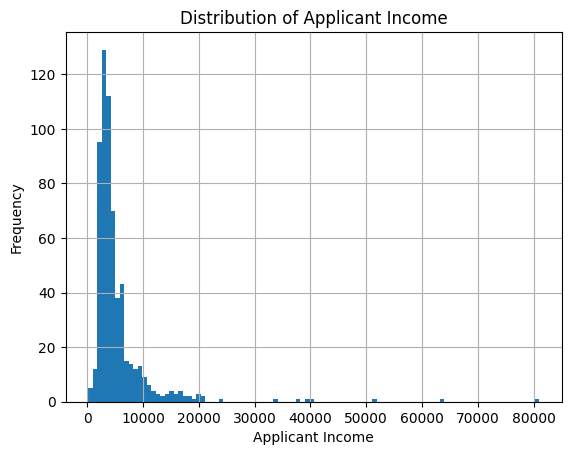

In [16]:
import pandas as pd
import matplotlib.pyplot as plt


df['ApplicantIncome'].hist(bins=100)  
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Distribution of Applicant Income')
plt.show()


Look at box plots to understand the distributions. 

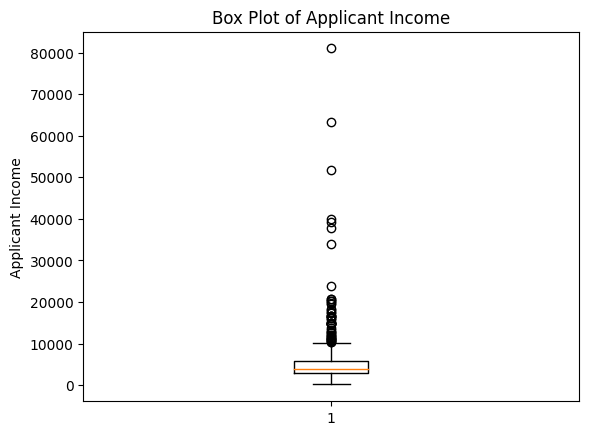

In [17]:
plt.boxplot(df['ApplicantIncome'])
plt.ylabel('Applicant Income')
plt.title('Box Plot of Applicant Income')
plt.show()

Look at the distribution of income segregated  by `Education`

In [18]:
income_education = df.groupby('Education')['ApplicantIncome'].size()
income_education

Education
Graduate        480
Not Graduate    134
Name: ApplicantIncome, dtype: int64

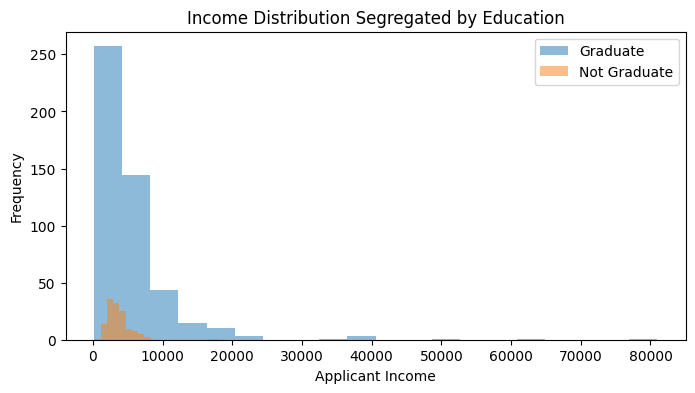

In [19]:
income_education = df.groupby('Education')['ApplicantIncome']
plt.figure(figsize=(8, 4))
for education, income in income_education:
    plt.hist(income, bins=20, label=education, alpha=0.5)

plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Income Distribution Segregated by Education')
plt.legend()
plt.show()

Look at the histogram and boxplot of LoanAmount

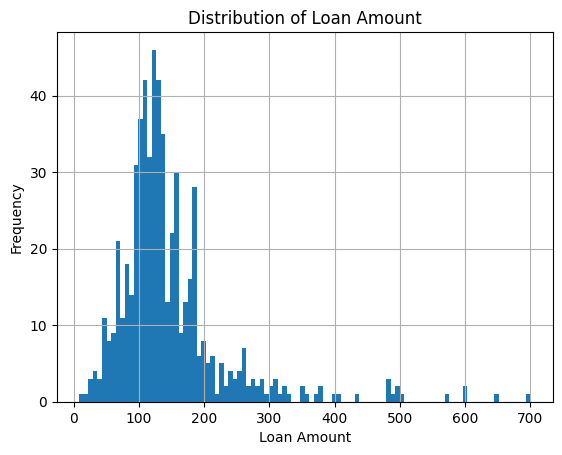

In [20]:
df['LoanAmount'].dropna().hist(bins=100)  
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amount')
plt.show()

In [21]:
df['LoanAmount']

0        NaN
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

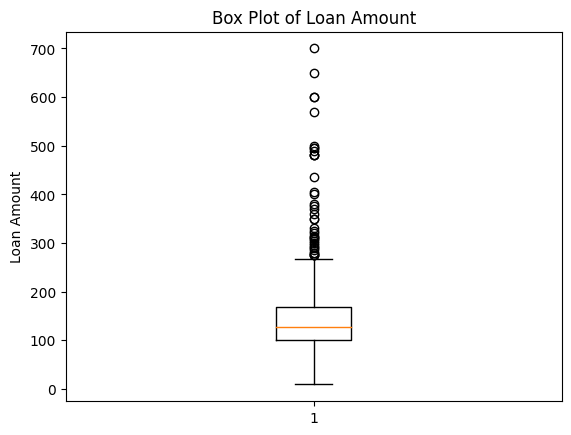

In [22]:
plt.boxplot(df['LoanAmount'].dropna())
plt.ylabel('Loan Amount')
plt.title('Box Plot of Loan Amount')
plt.show()

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [23]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [24]:
categorical_table = df.pivot_table(values='ApplicantIncome', index='Education', columns=['Self_Employed'])
categorical_table

Self_Employed,No,Yes
Education,,
Graduate,5504.203085,7735.507692
Not Graduate,3457.108108,6024.647059


In [25]:
categorical_table1 = df.pivot_table(values='ApplicantIncome', index='Education', columns=['Married'])
categorical_table1

Married,No,Yes
Education,,
Graduate,5174.476190,6225.355987
Not Graduate,4208.444444,3559.280899


In [26]:
categorical_table2 =  df.pivot_table(values='ApplicantIncome', index='Credit_History', columns=['Loan_Status'])
categorical_table2

Loan_Status,N,Y
Credit_History,,
0.0,5382.841463,9153.857143
1.0,5613.927835,5378.436508


In [27]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

Drop missing value:

In [29]:
df.dropna(subset=['Married', 'Gender'], inplace=True) 


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    object 
 4   Education          598 non-null    object 
 5   Self_Employed      566 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 65.4+ KB


Droped total 614-598 = 16 rows

In [31]:
loan_df = df.groupby('Loan_Amount_Term').size()
loan_df

Loan_Amount_Term
12.0       1
36.0       2
60.0       2
84.0       4
120.0      3
180.0     43
240.0      3
300.0     12
360.0    500
480.0     14
dtype: int64

In [32]:

Loan_status_df = df.groupby('Loan_Status').size()
Loan_status_df

Loan_Status
N    187
Y    411
dtype: int64

In [33]:
Loan_Amount_Term = df.groupby('Loan_Amount_Term')['LoanAmount'].size()
Loan_Amount_Term



Loan_Amount_Term
12.0       1
36.0       2
60.0       2
84.0       4
120.0      3
180.0     43
240.0      3
300.0     12
360.0    500
480.0     14
Name: LoanAmount, dtype: int64

In [34]:
# Missing Value for every columns:

missing_values1 = df.isna().sum().sort_values(ascending=False)
missing_values1

Credit_History       49
Self_Employed        32
LoanAmount           21
Loan_Amount_Term     14
Dependents           12
Loan_ID               0
Gender                0
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
missing_values_loan = df.groupby('Loan_Amount_Term')['LoanAmount'].apply(lambda x: x.isnull().sum())
missing_values_loan

Loan_Amount_Term
12.0      0
36.0      0
60.0      0
84.0      0
120.0     0
180.0     2
240.0     0
300.0     0
360.0    19
480.0     0
Name: LoanAmount, dtype: int64

In [36]:
loan_term_180 = df[df['Loan_Amount_Term'] == 180.0]
loan_term_180 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
62,LP001207,Male,Yes,0,Not Graduate,Yes,2609,3449.000000,165.0,180.0,0.0,Rural,N
66,LP001228,Male,No,0,Not Graduate,No,3200,2254.000000,126.0,180.0,0.0,Urban,N
91,LP001318,Male,Yes,2,Graduate,No,6250,5654.000000,188.0,180.0,1.0,Semiurban,Y
98,LP001334,Male,Yes,0,Not Graduate,No,4188,0.000000,115.0,180.0,1.0,Semiurban,Y
100,LP001345,Male,Yes,2,Not Graduate,No,4288,3263.000000,133.0,180.0,1.0,Urban,Y
115,LP001401,Male,Yes,1,Graduate,No,14583,0.000000,185.0,180.0,1.0,Rural,Y
128,LP001451,Male,Yes,1,Graduate,Yes,10513,3850.000000,160.0,180.0,0.0,Urban,N
142,LP001504,Male,No,0,Graduate,Yes,6950,0.000000,175.0,180.0,1.0,Semiurban,Y
144,LP001508,Male,Yes,2,Graduate,No,11757,0.000000,187.0,180.0,1.0,Urban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.000000,600.0,180.0,0.0,Semiurban,Y


In [37]:
mean_loan_180 = loan_term_180 ['LoanAmount'].mean()
mean_loan_180

146.6829268292683

In [38]:
loan_term_180['LoanAmount'].fillna(mean_loan_180, inplace=True)

C:\Users\Tania\AppData\Local\Temp\ipykernel_18516\3544462828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_term_180['LoanAmount'].fillna(mean_loan_180, inplace=True)


In [39]:
missing_values3 = loan_term_180.isna().sum().sort_values(ascending=False)
missing_values3 

Self_Employed        4
Dependents           1
Credit_History       1
Loan_ID              0
Gender               0
Married              0
Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Property_Area        0
Loan_Status          0
dtype: int64

In [40]:
loan_term_360 = df[df['Loan_Amount_Term'] == 360.0]
loan_term_360 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [41]:
mean_loan_360 = loan_term_360 ['LoanAmount'].mean()
mean_loan_360

146.78378378378378

In [42]:
loan_term_360['LoanAmount'].fillna(mean_loan_360, inplace=True)

C:\Users\Tania\AppData\Local\Temp\ipykernel_18516\2790751060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_term_360['LoanAmount'].fillna(mean_loan_360, inplace=True)


In [45]:
df=df.dropna(subset=['LoanAmount'])

In [46]:
merged_df = pd.merge(pd.merge(loan_term_360, loan_term_180, how='outer'), df, how='outer')


In [47]:
merged_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.783784,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002768,Male,No,0,Not Graduate,No,3358,0.0,80.000000,36.0,1.0,Semiurban,N
594,LP002862,Male,Yes,2,Not Graduate,No,6125,1625.0,187.000000,480.0,1.0,Semiurban,N
595,LP002868,Male,Yes,2,Graduate,No,3159,461.0,108.000000,84.0,1.0,Urban,Y
596,LP002912,Male,Yes,1,Graduate,No,4283,3000.0,172.000000,84.0,1.0,Rural,N


Loan_Status
N    176
Y    401
dtype: int64

In [48]:
Loan_status_mdf = merged_df.groupby('Loan_Status').size() 
Loan_status_mdf 

Loan_Status
N    187
Y    411
dtype: int64

In [49]:
missing_values_merged1 = merged_df.isna().sum().sort_values(ascending=False)
missing_values_merged1

Credit_History       49
Self_Employed        32
Loan_Amount_Term     14
Dependents           12
Loan_ID               0
Gender                0
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Property_Area         0
Loan_Status           0
dtype: int64

In [50]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    object 
 4   Education          598 non-null    object 
 5   Self_Employed      566 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         598 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 65.4+ KB


In [51]:
mean_loan_term = merged_df['Loan_Amount_Term'].mean()

mean_loan_term 

341.9178082191781

In [52]:
merged_df.loc[(merged_df['Loan_Amount_Term'].isnull()), 'Loan_Amount_Term'] = mean_loan_term

In [54]:
loan_term1 = merged_df.groupby('Loan_Amount_Term').size()
loan_term1

Loan_Amount_Term
12.000000       1
36.000000       2
60.000000       2
84.000000       4
120.000000      3
180.000000     43
240.000000      3
300.000000     12
341.917808     14
360.000000    500
480.000000     14
dtype: int64

Loan_Status
N    187
Y    411
dtype: int64

In [55]:
Loan_status_md1= merged_df.groupby('Loan_Status').size() 
Loan_status_md1 

Loan_Status
N    187
Y    411
dtype: int64

In [56]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    object 
 4   Education          598 non-null    object 
 5   Self_Employed      566 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         598 non-null    float64
 9   Loan_Amount_Term   598 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 65.4+ KB


In [57]:
#mode_dep = merged_df['Dependents'].mode()[0]

# If married = Yes and Dependents is null, fill with mode
#merged_df.loc[(merged_df['Married'] == 'Yes') & (merged_df['Dependents'].isnull()), 'Dependents'] = mode_dep

# If married = No and Dependents is null, fill with 0
#merged_df.loc[(merged_df['Married'] == 'No') & (merged_df['Dependents'].isnull()), 'Dependents'] = 0


In [58]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    object 
 4   Education          598 non-null    object 
 5   Self_Employed      566 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         598 non-null    float64
 9   Loan_Amount_Term   598 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 65.4+ KB


In [59]:
# Self_Employed - No

merged_df.loc[(merged_df['Self_Employed'].isnull()), 'Self_Employed'] = 'No'
merged_df.loc[(merged_df['Dependents'].isnull()), 'Dependents'] = 0
merged_df.loc[(merged_df['Credit_History'].isnull()),'Credit_History'] = 0.0


In [60]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         598 non-null    object 
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         598 non-null    float64
 9   Loan_Amount_Term   598 non-null    float64
 10  Credit_History     598 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 65.4+ KB


In [61]:
merged_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.783784,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002768,Male,No,0,Not Graduate,No,3358,0.0,80.000000,36.0,1.0,Semiurban,N
594,LP002862,Male,Yes,2,Not Graduate,No,6125,1625.0,187.000000,480.0,1.0,Semiurban,N
595,LP002868,Male,Yes,2,Graduate,No,3159,461.0,108.000000,84.0,1.0,Urban,Y
596,LP002912,Male,Yes,1,Graduate,No,4283,3000.0,172.000000,84.0,1.0,Rural,N


In [62]:
loan_term2 = merged_df.groupby('Loan_Amount_Term').size()
loan_term2

Loan_Amount_Term
12.000000       1
36.000000       2
60.000000       2
84.000000       4
120.000000      3
180.000000     43
240.000000      3
300.000000     12
341.917808     14
360.000000    500
480.000000     14
dtype: int64

In [63]:
# Missing Value for every columns:

missing_values_merged = merged_df.isna().sum().sort_values(ascending=False)
missing_values_merged 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [64]:
merged_df['LoanAmount'] = pd.to_numeric(merged_df['LoanAmount'], errors='coerce')

Text(0.5, 1.0, 'Histogram of LoanAmount (Before Transformation)')

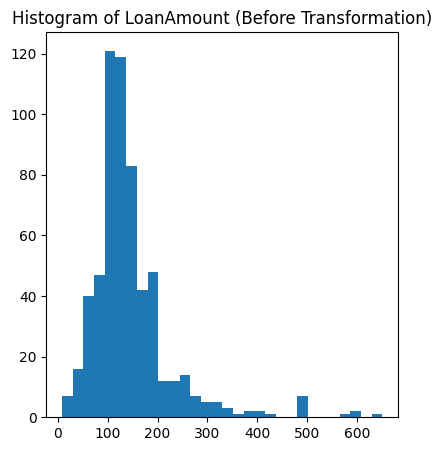

In [65]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(merged_df['LoanAmount'], bins=30)
plt.title('Histogram of LoanAmount (Before Transformation)')

In [66]:
merged_df['LoanAmount_log'] = np.log(merged_df['LoanAmount'])

In [67]:
merged_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.783784,360.0,1.0,Urban,Y,4.988961
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002768,Male,No,0,Not Graduate,No,3358,0.0,80.000000,36.0,1.0,Semiurban,N,4.382027
594,LP002862,Male,Yes,2,Not Graduate,No,6125,1625.0,187.000000,480.0,1.0,Semiurban,N,5.231109
595,LP002868,Male,Yes,2,Graduate,No,3159,461.0,108.000000,84.0,1.0,Urban,Y,4.682131
596,LP002912,Male,Yes,1,Graduate,No,4283,3000.0,172.000000,84.0,1.0,Rural,N,5.147494


Text(0.5, 1.0, 'Histogram of LoanAmount (After Transformation)')

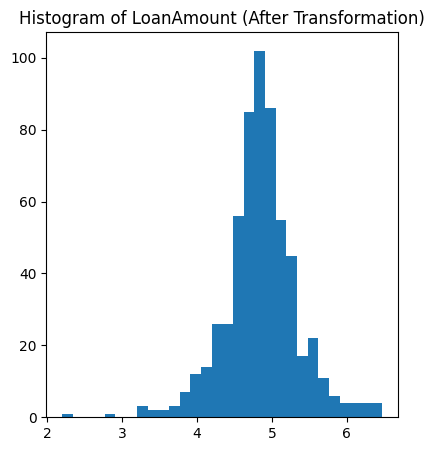

In [68]:
valid_loan_amount_log = merged_df['LoanAmount_log'].replace(-np.inf, np.nan).dropna()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(valid_loan_amount_log, bins=30)
plt.title('Histogram of LoanAmount (After Transformation)')

Combine both incomes as total income and take a log transformation of the same.

In [69]:
merged_df['Combined_Incomes'] = merged_df['ApplicantIncome']+merged_df['CoapplicantIncome']

merged_df['Combined_Incomes'] = pd.to_numeric(merged_df['Combined_Incomes'], errors='coerce')


valid_combined_incomes = merged_df['Combined_Incomes'].loc[merged_df['Combined_Incomes'] > 0]



In [70]:
merged_df['Combined_incomes_Log'] = np.log(merged_df['Combined_Incomes'])

merged_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Combined_Incomes,Combined_incomes_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.783784,360.0,1.0,Urban,Y,4.988961,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002768,Male,No,0,Not Graduate,No,3358,0.0,80.000000,36.0,1.0,Semiurban,N,4.382027,3358.0,8.119101
594,LP002862,Male,Yes,2,Not Graduate,No,6125,1625.0,187.000000,480.0,1.0,Semiurban,N,5.231109,7750.0,8.955448
595,LP002868,Male,Yes,2,Graduate,No,3159,461.0,108.000000,84.0,1.0,Urban,Y,4.682131,3620.0,8.194229
596,LP002912,Male,Yes,1,Graduate,No,4283,3000.0,172.000000,84.0,1.0,Rural,N,5.147494,7283.0,8.893298


In [71]:
loan = merged_df.groupby('Loan_Amount_Term').size()
loan

Loan_Amount_Term
12.000000       1
36.000000       2
60.000000       2
84.000000       4
120.000000      3
180.000000     43
240.000000      3
300.000000     12
341.917808     14
360.000000    500
480.000000     14
dtype: int64

In [72]:
import numpy as np

In [73]:
target_value = 341.917808
tolerance = 1e-6

mask = np.isclose(merged_df['Loan_Amount_Term'], target_value, atol=tolerance)
merged_df.loc[mask, 'Loan_Amount_Term'] = 8

In [74]:
prop_area = merged_df.groupby('Property_Area').size()
prop_area

Property_Area
Rural        175
Semiurban    225
Urban        198
dtype: int64

In [75]:
merged_df['Gender'] = merged_df['Gender'].replace({'Male': 1, 'Female': 0})
merged_df['Married'] = merged_df['Married'].replace({'Yes': 1, 'No': 0})
merged_df['Education'] = merged_df['Education'].replace({'Graduate': 1, 'Not Graduate': 0})
merged_df['Self_Employed'] = merged_df['Self_Employed'].replace({'Yes': 1, 'No': 0})
merged_df['Loan_Status'] = merged_df['Loan_Status'].replace({'Y': 1, 'N': 0})

merged_df['Loan_Amount_Term'] = merged_df['Loan_Amount_Term'].replace({12.0: 0, 36.0: 1, 60.0: 2, 84.0: 3, 120.0: 4, 
                                                                       180.0: 5, 240.0: 6, 300.0: 7, 
                                                                
                                                                       360.0: 9, 480.00000: 10})

merged_df['Dependents'] = merged_df['Dependents'].replace({'0': 0, '1': 1, '2': 2, '3+': 3})
merged_df['Property_Area'] = merged_df['Property_Area'].replace({'Rural': 0, 'Semiurban': 1, '2': 2, 'Urban': 3})


merged_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Combined_Incomes,Combined_incomes_Log
0,LP001002,1,0,0,1,0,5849,0.0,146.783784,9.0,1.0,3,1,4.988961,5849.0,8.674026
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,9.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,9.0,1.0,3,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,9.0,1.0,3,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,9.0,1.0,3,1,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002768,1,0,0,0,0,3358,0.0,80.000000,1.0,1.0,1,0,4.382027,3358.0,8.119101
594,LP002862,1,1,2,0,0,6125,1625.0,187.000000,10.0,1.0,1,0,5.231109,7750.0,8.955448
595,LP002868,1,1,2,1,0,3159,461.0,108.000000,3.0,1.0,3,1,4.682131,3620.0,8.194229
596,LP002912,1,1,1,1,0,4283,3000.0,172.000000,3.0,1.0,0,0,5.147494,7283.0,8.893298


In [76]:
loan1 = merged_df.groupby('Loan_Amount_Term').size()
loan1

Loan_Amount_Term
0.0       1
1.0       2
2.0       2
3.0       4
4.0       3
5.0      43
6.0       3
7.0      12
8.0      14
9.0     500
10.0     14
dtype: int64

In [77]:
loan_Status = merged_df.groupby('Loan_Status').size()
loan_Status

Loan_Status
0    187
1    411
dtype: int64

In [78]:
columns = ['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Combined_Incomes']
merged_df = merged_df.drop(columns= columns, axis=1 )
merged_df


,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Combined_incomes_Log
0,1,0,0,1,0,9.0,1.0,3,1,4.988961,8.674026
1,1,1,1,1,0,9.0,1.0,0,0,4.852030,8.714568
2,1,1,0,1,1,9.0,1.0,3,1,4.189655,8.006368
3,1,1,0,0,0,9.0,1.0,3,1,4.787492,8.505323
4,1,0,0,1,0,9.0,1.0,3,1,4.948760,8.699515
...,...,...,...,...,...,...,...,...,...,...,...
593,1,0,0,0,0,1.0,1.0,1,0,4.382027,8.119101
594,1,1,2,0,0,10.0,1.0,1,0,5.231109,8.955448
595,1,1,2,1,0,3.0,1.0,3,1,4.682131,8.194229
596,1,1,1,1,0,3.0,1.0,0,0,5.147494,8.893298


In [79]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 597
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                598 non-null    int64  
 1   Married               598 non-null    int64  
 2   Dependents            598 non-null    int64  
 3   Education             598 non-null    int64  
 4   Self_Employed         598 non-null    int64  
 5   Loan_Amount_Term      598 non-null    float64
 6   Credit_History        598 non-null    float64
 7   Property_Area         598 non-null    int64  
 8   Loan_Status           598 non-null    int64  
 9   LoanAmount_log        598 non-null    float64
 10  Combined_incomes_Log  598 non-null    float64
dtypes: float64(4), int64(7)
memory usage: 56.1 KB


## 4. Building a Predictive Model

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X = merged_df.drop(columns=['Loan_Status']) 
y = merged_df['Loan_Status'] # prediction

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
y_train

145    0
9      0
374    1
521    1
188    1
      ..
71     1
106    1
270    1
435    0
102    1
Name: Loan_Status, Length: 478, dtype: int64

In [84]:
y_train = y_train.astype(int)

In [85]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Combined_incomes_Log
145,1,0,0,1,0,9.0,0.0,0,4.204693,8.850661
9,1,1,1,1,0,9.0,1.0,1,5.855072,10.077819
374,1,0,2,1,0,9.0,1.0,0,4.912655,8.378850
521,1,1,1,0,0,5.0,1.0,3,4.709530,8.524963
188,1,1,1,1,0,9.0,1.0,1,4.941642,8.503905
...,...,...,...,...,...,...,...,...,...,...
71,1,1,2,0,0,9.0,0.0,1,4.595120,8.581669
106,1,0,0,1,0,9.0,1.0,1,4.248495,7.907652
270,1,0,1,1,0,9.0,1.0,3,4.762174,8.728588
435,1,0,1,1,0,9.0,0.0,1,5.278115,9.328123


Norm amd Scal Data: 

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [87]:
X_train = scaler.fit_transform(X_train)

Selected Logistic Regration: 

In [88]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()



In [89]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [90]:
log_model.predict(X_train)



array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [91]:
log_model.score(X_train, y_train)

0.7656903765690377

Try paramater grid search to improve the results

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


In [93]:
param_grid_dt = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

In [94]:
dt_model = DecisionTreeClassifier()

In [95]:
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5)

In [96]:
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10]})

In [97]:
best_dt_model = grid_search_dt.best_estimator_
best_dt_model

DecisionTreeClassifier(max_depth=3)

In [98]:
dt_score = best_dt_model.score(X_test, y_test)
dt_score

c:\Users\Tania\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.7166666666666667

## 5. (Stretch) Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [99]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

#X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])


pipe.fit(X_train, y_train)
Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

# `pipeline.predict(x)`
predictions = pipe.predict(X_test)
print(predictions)

pipe.score(X_test, y_test) 

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1
 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1]


0.8